In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy.stats import linregress

In [2]:
def plot_lines(*args, **kwargs):
    """
    Рисует графики. Пример (нарисует линии):
    >>> plot_lines(([1, 2], [2, 3], 'name'), ([3, 4, 5], [9, 16, 25], 'name2'))
    :param args: Кортеж из данных
    :param kwargs: Сюда можно передать 'title', и он отобразится в графике
    """
    title = kwargs.get('title')
    x_label, y_label = kwargs.get('x_label'), kwargs.get('y_label')
    is_scatter_global, save_to = kwargs.get('is_scatter'), kwargs.get('save_to')
    for (x_data, *y_data) in args:
        # Если передали title, то его
        has_label = False
        is_temp_reverse = False
        if len(y_data) == 2:
            has_label = True
            label = y_data[1]
            y_data = y_data[0]
        elif len(y_data) == 1:
            y_data = y_data[0]
        elif len(y_data) > 2:
            # Если передали, что это должна быть линия
            has_label = True
            label = y_data[1]
            y_data = y_data[0]
            is_temp_reverse = y_data[2]
        if is_temp_reverse:
            is_scatter = not is_scatter_global
        else:
            is_scatter = is_scatter_global
        if has_label:
            if not is_scatter:
                plt.plot(x_data, y_data, label=label)
            else:
                plt.scatter(x_data, y_data, label=label, marker='x')
            plt.legend()
        else:
            if not is_scatter:
                plt.plot(x_data, y_data)
            else:
                plt.scatter(x_data, y_data, marker='x')
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.grid()
    if save_to:
        plt.savefig(save_to)
    plt.show()

In [3]:
def get_regression_results(data, x_label='ms', y_label='%'):
    """
    Считает линейную регрессию по данным и возвращает ее параметры:
    >>> get_regression_results([[1, 2, 3], [4, 5, 6]])
    :param data: Данные для регрессии, двумерный датафрейм
    :param x_label: Имя колонки, которая будет использована как 'x'
    :param y_label: Имя колонки, которая будет использована как 'y'
    :returns: (slope, intercept, std_err), reg_data
    """
    from scipy.stats import linregress
    import numpy as np
    x, y = data.copy()[x_label], data.copy()[y_label]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    new_x = np.linspace(np.min(x)*0.9, np.max(x)*1.1, 10*5)
    new_y = new_x*slope + intercept
    return (slope, intercept, std_err), np.array([new_x, new_y])

In [4]:
fid_h2o = pd.read_csv('fid-h2o.txt', sep='\t', header=5, names=['ms', '%'])

In [5]:
fid_mn_20 = pd.read_csv('fid-MnSO4-20.txt', sep='\t', header=5, names=['ms', '%'])
fid_mn_20['V'] = 20
fid_mn_40 = pd.read_csv('fid-MnSO4-40.txt', sep='\t', header=5, names=['ms', '%'])
fid_mn_40['V'] = 40
# NOTE: у нас нет данных на fid_mn_60. Проебались, не иначе
fid_mn = pd.concat([fid_mn_20, fid_mn_40,], ignore_index=True)

In [6]:
t1_mn_20 = pd.read_csv('t1-MnSO4-20.txt', sep='\t', header=5, names=['ms', '%'])
t1_mn_20['V'] = 20
t1_mn_40 = pd.read_csv('t1-MnSO4-40.txt', sep='\t', header=5, names=['ms', '%'])
t1_mn_40['V'] = 40
t1_mn_60 = pd.read_csv('t1-MnSO4-60.txt', sep='\t', header=5, names=['ms', '%'])
t1_mn_60['V'] = 60
t1_mn = pd.concat([t1_mn_20, t1_mn_40, t1_mn_60], ignore_index=True)

In [7]:
t2_mn_20 = pd.read_csv('t2-MnSO4-20.txt', sep='\t', header=5, names=['ms', '%'])
t2_mn_20['V'] = 20
t2_mn_40 = pd.read_csv('t2-MnSO4-40.txt', sep='\t', header=5, names=['ms', '%'])
t2_mn_40['V'] = 40
t2_mn_60 = pd.read_csv('t2-MnSO4-60.txt', sep='\t', header=5, names=['ms', '%'])
t2_mn_60['V'] = 60
t2_mn = pd.concat([t2_mn_20, t2_mn_40, t2_mn_60], ignore_index=True)

## Определение $T_2$

Для $T_2$ ожидаем зависимость:
$$
M(2n \tau) = M_0 \exp\left(-\frac{2 n \tau}{T_2}\right)
$$

In [8]:
T_df = pd.DataFrame({'salt': [], 
                     'C': [], 
                     'T_1': [], 
                     'T_2': [], 
                     'T_2*': []}
                   )

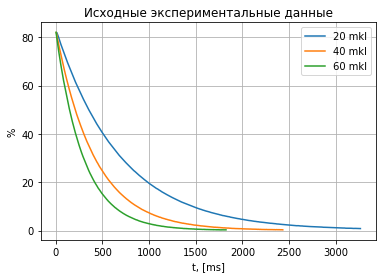

In [9]:
# Остечем "хвост" у данных, поскольку он плохо аппроксимируется
# Эти хвосты соответствуют хвостам экспоненты
plot_data_20 = t2_mn[t2_mn['V'] == 20].copy()[:230]
plot_data_40 = t2_mn[t2_mn['V'] == 40].copy()[:400]
plot_data_60 = t2_mn[t2_mn['V'] == 60].copy()[:450]

plot_lines((plot_data_20['ms'], plot_data_20['%'], '20 mkl'), 
         (plot_data_40['ms'], plot_data_40['%'], '40 mkl'),
         (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
           x_label='t, [ms]', y_label='%', title='Исходные экспериментальные данные', 
           save_to='Mn_T_2_exper.pdf'
           #is_scatter=True
        )

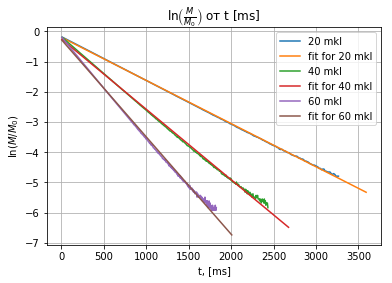

In [10]:
plot_data_20['%'] = np.log(plot_data_20['%']/100)
plot_data_40['%'] = np.log(plot_data_40['%']/100)
plot_data_60['%'] = np.log(plot_data_60['%']/100)

reg_data_20 = plot_data_20
reg_data_40 = plot_data_40
reg_data_60 = plot_data_60

plot_lines(
    (plot_data_20['ms'], plot_data_20['%'], '20 mkl'),
    (*get_regression_results(reg_data_20)[1], 'fit for 20 mkl'),
    (plot_data_40['ms'], plot_data_40['%'], '40 mkl'),
    (*get_regression_results(reg_data_40)[1], 'fit for 40 mkl'),
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    (*get_regression_results(reg_data_60)[1], 'fit for 60 mkl'),
    x_label='t, [ms]', y_label=r'$\ln(M/M_0)$', 
    title=r'$\ln\left(\frac{M}{M_0}\right)$ от t [ms]',
    save_to='Mn_T_2_reg.pdf'
)

In [11]:
for i in [20, 40, 60]:
    data = globals()['plot_data_'+str(i)]
    reg = linregress(data['ms'], data['%'])
    T_df.loc[str(i)+'_mn'] = ['mn', i, np.nan, -1/reg.slope, np.nan]

In [12]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,NaN,700.953789,NaN
40_mn,mn,40.0,NaN,429.785639,NaN
60_mn,mn,60.0,NaN,310.944742,NaN


Изначальные данные

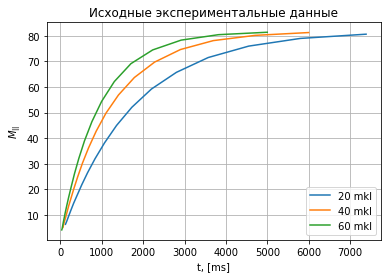

In [13]:
plot_data_20 = t1_mn[t1_mn['V'] == 20].copy()[:18]
plot_data_40 = t1_mn[t1_mn['V'] == 40].copy()
plot_data_60 = t1_mn[t1_mn['V'] == 60].copy()

plot_lines(
    (plot_data_20['ms'], plot_data_20['%'], '20 mkl'), 
    (plot_data_40['ms'], plot_data_40['%'], '40 mkl'),
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    x_label='t, [ms]', y_label=r'$M_{||}$', title='Исходные экспериментальные данные',
    save_to='Mn_T_1_exp.pdf'
)

Ожидаем зависимость 
$$
M_{||} (\tau_1) = M_0 \left(1 - \exp \left(-\dfrac{\tau_1}{T_1}\right)\right)
$$
$$
\ln\left(1 - \dfrac{M_{||} (\tau_1)}{M_0}\right) = -\dfrac{\tau_1}{T_1}
$$

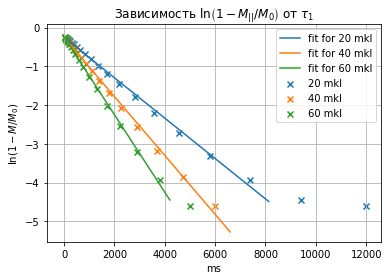

In [14]:
plot_data_20 = t1_mn[t1_mn['V'] == 20].copy()
plot_data_20['%'] += (99 - plot_data_20.copy()['%'][-1:]).values[0]
plot_data_20['%'] = np.log(1 - plot_data_20['%']/100)

plot_data_40 = t1_mn[t1_mn['V'] == 40].copy()
plot_data_40['%'] += (99 - plot_data_40.copy()['%'][-1:]).values[0]
plot_data_40['%'] = np.log(1 - plot_data_40['%']/100)

plot_data_60 = t1_mn[t1_mn['V'] == 60].copy()
plot_data_60['%'] += (99 - plot_data_60.copy()['%'][-1:]).values[0]
plot_data_60['%'] = np.log(1 - plot_data_60['%']/100)

reg_data_20 = plot_data_20[:-2]
reg_data_40 = plot_data_40
reg_data_60 = plot_data_60[:-1]

plot_lines(
    (plot_data_20['ms'], plot_data_20['%'], '20 mkl'), 
    (*get_regression_results(reg_data_20)[1], 'fit for 20 mkl', True),
    (plot_data_40['ms'], plot_data_40['%'], '40 mkl'),
    (*get_regression_results(reg_data_40)[1], 'fit for 40 mkl', True),
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    (*get_regression_results(reg_data_60)[1], 'fit for 60 mkl', True),
    x_label='ms', y_label=r'$\ln(1-M/M_0)$', 
    title=r'Зависимость $\ln\left(1 - M_{||}/M_0\right)$ от $\tau_1$',
    is_scatter=True, save_to='Mn_T_1_reg.pdf'
)

# Добавим в T
for i in [20, 40, 60]:
    data = globals()['plot_data_'+str(i)]
    reg_data = globals()['reg_data_' + str(i)]
    T_df.loc[str(i)+'_mn', 'T_1'] = -1/get_regression_results(reg_data)[0][0]

In [15]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,1916.731102,700.953789,NaN
40_mn,mn,40.0,1314.994472,429.785639,NaN
60_mn,mn,60.0,997.851468,310.944742,NaN


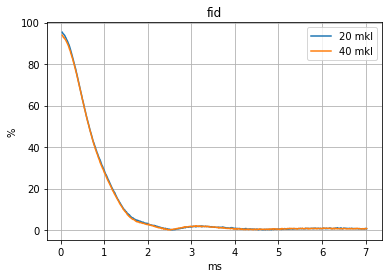

In [16]:
plot_lines(
    (fid_mn_20['ms'], fid_mn_20['%'], '20 mkl'), 
    (fid_mn_40['ms'], fid_mn_40['%'], '40 mkl'),
    #(fid_mn_60['ms'], fid_mn_60['%'], '60 mkl'),
    x_label='ms', y_label='%', title='fid',
    save_to='Mn_fid.pdf'
)

In [17]:
# Это вобьем руками
T_df.loc['20_mn', 'T_2*'] = 0.68
T_df.loc['40_mn', 'T_2*'] = 0.68
T_df.loc['60_mn', 'T_2*'] = 0.68

In [18]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,1916.731102,700.953789,0.68
40_mn,mn,40.0,1314.994472,429.785639,0.68
60_mn,mn,60.0,997.851468,310.944742,0.68


## Теперь то же самое для $Na_2 SO_4$

In [19]:
#T_df = pd.DataFrame({'salt': [], 
#                     'C': [], 
#                     'T_1': [], 
#                     'T_2': [], 
#                     'T_2*': []}
#                   )

In [20]:
fid_na_0 = pd.read_csv('fid-NaSO4-0.txt', sep='\t', header=5, names=['ms', '%'])
fid_na_0['V'] = 0
fid_na_20 = pd.read_csv('fid-NaSO4-20.txt', sep='\t', header=5, names=['ms', '%'])
fid_na_20['V'] = 20
fid_na_60 = pd.read_csv('fid-NaSO4-60.txt', sep='\t', header=5, names=['ms', '%'])
fid_na_60['V'] = 60
# NOTE: у нас нет данных на fid_na_60. Проебались, не иначе
fid_na = pd.concat([fid_na_0, fid_na_20, fid_na_60,], ignore_index=True)

t1_na_20 = pd.read_csv('t1-NaSO4-20.txt', sep='\t', header=5, names=['ms', '%'])
t1_na_20['V'] = 20
t1_na_60 = pd.read_csv('t1-NaSO4-60.txt', sep='\t', header=5, names=['ms', '%'])
t1_na_60['V'] = 60
t1_na = pd.concat([t1_na_20, t1_na_60], ignore_index=True)

t2_na_0 = pd.read_csv('t2-NaSO4-0.txt', sep='\t', header=5, names=['ms', '%'])
t2_na_0['V'] = 0
t2_na_60 = pd.read_csv('t2-NaSO4-60.txt', sep='\t', header=5, names=['ms', '%'])
t2_na_60['V'] = 60
t2_na = pd.concat([t2_na_0, t2_na_60], ignore_index=True)

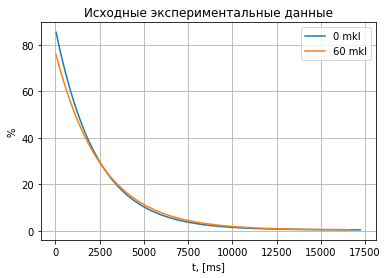

In [21]:
# Остечем "хвост" у данных, поскольку он плохо аппроксимируется
# Эти хвосты соответствуют хвостам экспоненты
plot_data_0 = t2_na[t2_na['V'] == 0].copy()[:-40]
plot_data_60 = t2_na[t2_na['V'] == 60].copy()

plot_lines((plot_data_0['ms'], plot_data_0['%'], '0 mkl'), 
         (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
           x_label='t, [ms]', y_label='%', title='Исходные экспериментальные данные', 
           save_to='Na_T_2_exper.pdf'
           #is_scatter=True
        )

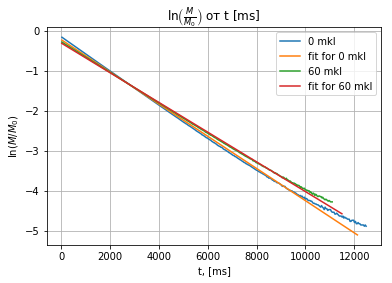

In [22]:
plot_data_0 = t2_na[t2_na['V'] == 0].copy()[:-170]
plot_data_60 = t2_na[t2_na['V'] == 60].copy()[:-170]
plot_data_0['%'] = np.log(plot_data_0['%']/100)
plot_data_60['%'] = np.log(plot_data_60['%']/100)

reg_data_0 = plot_data_0[:-40]
reg_data_60 = plot_data_60[:-20]

plot_lines(
    (plot_data_0['ms'], plot_data_0['%'], '0 mkl'),
    (*get_regression_results(reg_data_0)[1], 'fit for 0 mkl'),
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    (*get_regression_results(reg_data_60)[1], 'fit for 60 mkl'),
    x_label='t, [ms]', y_label=r'$\ln(M/M_0)$', 
    title=r'$\ln\left(\frac{M}{M_0}\right)$ от t [ms]',
    save_to='Na_T_2_reg.pdf'
)

In [23]:
for i in [0, 60]:
    data = globals()['plot_data_'+str(i)]
    reg = linregress(data['ms'], data['%'])
    T_df.loc[str(i)+'_na'] = ['Na', i, np.nan, -1/reg.slope, np.nan]

In [24]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,1916.731102,700.953789,0.68
40_mn,mn,40.0,1314.994472,429.785639,0.68
60_mn,mn,60.0,997.851468,310.944742,0.68
0_na,Na,0.0,NaN,2563.068945,NaN
60_na,Na,60.0,NaN,2714.577389,NaN


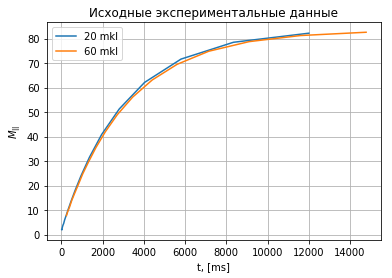

In [25]:
plot_data_20 = t1_na[t1_na['V'] == 20].copy()
plot_data_60 = t1_na[t1_na['V'] == 60].copy()[:-2]

plot_lines(
    (plot_data_20['ms'], plot_data_20['%'], '20 mkl'), 
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    x_label='t, [ms]', y_label=r'$M_{||}$', title='Исходные экспериментальные данные',
    save_to='Na_T_1_exp.pdf'
)

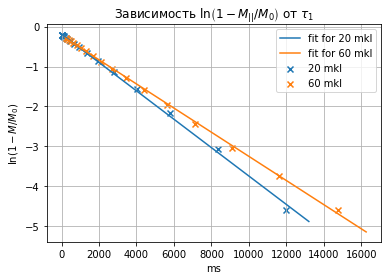

In [26]:
plot_data_20 = t1_na[t1_na['V'] == 20].copy()
plot_data_20['%'] += (99 - plot_data_20.copy()['%'][-1:]).values[0]
plot_data_20['%'] = np.log(1 - plot_data_20['%']/100)

plot_data_60 = t1_na[t1_na['V'] == 60].copy()[:-2]
plot_data_60['%'] += (99 - plot_data_60.copy()['%'][-1:]).values[0]
plot_data_60['%'] = np.log(1 - plot_data_60['%']/100)

reg_data_20 = plot_data_20
reg_data_60 = plot_data_60

plot_lines(
    (plot_data_20['ms'], plot_data_20['%'], '20 mkl'), 
    (*get_regression_results(reg_data_20)[1], 'fit for 20 mkl', True),
    (plot_data_60['ms'], plot_data_60['%'], '60 mkl'),
    (*get_regression_results(reg_data_60)[1], 'fit for 60 mkl', True),
    x_label='ms', y_label=r'$\ln(1-M/M_0)$', 
    title=r'Зависимость $\ln\left(1 - M_{||}/M_0\right)$ от $\tau_1$',
    is_scatter=True, save_to='Na_T_1_reg.pdf'
)

# Добавим в T
for i in [20, 60]:
    data = globals()['plot_data_'+str(i)]
    reg_data = globals()['reg_data_' + str(i)]
    T_df.loc[str(i)+'_na', 'T_1'] = -1/get_regression_results(reg_data)[0][0]

In [27]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,1916.731102,700.953789,0.68
40_mn,mn,40.0,1314.994472,429.785639,0.68
60_mn,mn,60.0,997.851468,310.944742,0.68
0_na,Na,0.0,NaN,2563.068945,NaN
60_na,Na,60.0,3305.489338,2714.577389,NaN
20_na,NaN,NaN,2810.293796,NaN,NaN


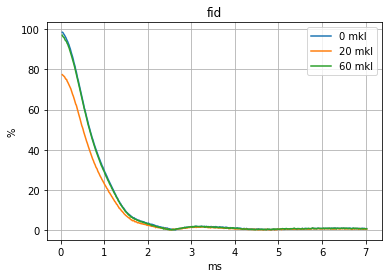

In [28]:
plot_lines(
    (fid_na[fid_na['V'] == 0]['ms'], fid_na[fid_na['V'] == 0]['%'], '0 mkl'), 
    (fid_na[fid_na['V'] == 20]['ms'], fid_na[fid_na['V'] == 20]['%'], '20 mkl'),
    (fid_na[fid_na['V'] == 60]['ms'], fid_na[fid_na['V'] == 60]['%'], '60 mkl'),
    x_label='ms', y_label='%', title='fid',
    save_to='Na_fid.pdf'
)

In [29]:
# Это вобьем руками
T_df.loc['0_na', 'T_2*'] = 0.68
T_df.loc['20_na', 'T_2*'] = 0.68
T_df.loc['40_na', 'T_2*'] = 0.68
T_df.loc['60_na', 'T_2*'] = 0.68

In [30]:
T_df

,salt,C,T_1,T_2,T_2*
20_mn,mn,20.0,1916.731102,700.953789,0.68
40_mn,mn,40.0,1314.994472,429.785639,0.68
60_mn,mn,60.0,997.851468,310.944742,0.68
0_na,Na,0.0,NaN,2563.068945,0.68
60_na,Na,60.0,3305.489338,2714.577389,0.68
20_na,NaN,NaN,2810.293796,NaN,0.68
40_na,NaN,NaN,NaN,NaN,0.68
